## PCG timings - Figure 3

This notebook creates the plots presented in Figure 3 of the FlyWire paper. 

In [1]:
import os
import dill
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
from flywirepaper import plotting

## Define relevant paths and create directories

In [3]:
data_dir = f"{os.path.realpath('')}/../data"
figure_dir = f"{os.path.realpath('')}/../figures/figure_3/"
figure_source_dir = f"{os.path.realpath('')}/../figures/figure_source_3/"

if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
    
if not os.path.exists(figure_source_dir):
    os.makedirs(figure_source_dir)

## e & f: Speed measurements from server 

e & f show data as it was measured on the server from real requests during FlyWire's beta phase


Loading data for plots e & f. The data is organized as a dictionary: The keys are the types of requests and the values are arrays with individual measruments in milliseconds.

In [4]:
with open(f"{data_dir}/pcg_logged_times_betaphase.dl", "rb") as f:
    pcg_logged_time_dict = dill.load(f)
    
pcg_logged_time_dict.keys()

dict_keys(['leaves', 'merge', 'root', 'split'])

Helper functions:

In [5]:
def ks_string(ks):
    s = ks[0]
    for k in ks[1:]:
        s += f"_{k}"
    return s

label_remap = {"root": "leaves to root", "leaves": "root to leaves"}

Plotting e:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


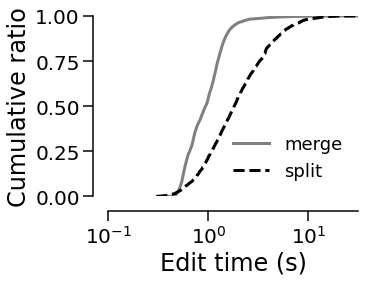

In [6]:
ks = ["merge", "split"]

plotting.comp_cumplot({label_remap.get(k, k): np.array(pcg_logged_time_dict[k]) / 1e3 for k in ks}, 
                      xlabel=r"Edit time (s)",
                      xlog=True,
                      color_list=[".5", "k"],
                      linestyles=["-", "--"],
                      xrange=[10**(-1), 10**1.5],
                      figsize=(5, 4),
                      yrange=[0, 1],
                      path=f"{figure_dir}/time_meas_{ks_string(ks)}.png")

Plotting f:

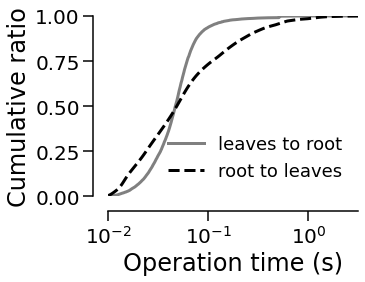

In [7]:
ks = ["root", "leaves"]

plotting.comp_cumplot({label_remap.get(k, k): np.array(pcg_logged_time_dict[k]) / 1e3 for k in ks}, 
                      xlabel=r"Operation time (s)",
                      xlog=True,
                      color_list=[".5", "k"],
                      linestyles=["-", "--"],
                      xrange=[10**(-2), 10**.5],
                      figsize=(5, 4),
                      yrange=[0, 1],
                      path=f"{figure_dir}/time_meas_{ks_string(ks)}.png")

Statistics:

In [8]:
scenarios = list(pcg_logged_time_dict.keys())

stat_dict = {
    "N": [len(pcg_logged_time_dict[k]) for k in scenarios],
    "median": [np.median(pcg_logged_time_dict[k]) for k in scenarios],
    "mean": [np.mean(pcg_logged_time_dict[k]) for k in scenarios],
    "95th percentile": [np.percentile(pcg_logged_time_dict[k], 95) for k in scenarios],
    "99th percentile": [np.percentile(pcg_logged_time_dict[k], 99) for k in scenarios],
}

In [9]:
pd.DataFrame.from_dict(stat_dict, orient="index", columns=scenarios)

,leaves,merge,root,split
N,3.080494e+06,4612.000000,12096.000000,2497.000000
median,4.843330e+01,940.184236,46.927691,1818.701029
mean,1.183933e+02,1101.751980,58.090953,2619.982488
95th percentile,4.653672e+02,1841.025710,110.901415,7137.335587
99th percentile,1.198934e+03,3846.534014,507.057011,12707.077942


In [10]:
source_data_df = pd.DataFrame.from_dict({label_remap.get(k, k): pcg_logged_time_dict[k] for k in pcg_logged_time_dict}, 
                                        orient="index").T

In [11]:
source_data_df.to_csv(f"{figure_source_dir}/e_f_source.csv")

## g,h,i: Naive vs PCG

g, h, i present data that was measured in a closed-off trial re-using real requests from FlyWire's beta phase

In [12]:
meas_df = pd.read_csv(f"{data_dir}/pcg_vs_naive.csv")
meas_df.head(5)

,n_sv_local,n_sv_global,read_pcg,read_naive,mincut_pcg,mincut_naive
0,1747.0,198265.0,0.487415,18.161884,0.086510,10.083718
1,1690.0,198208.0,0.301935,16.024543,0.072406,9.701734
2,915.0,197141.0,0.205589,17.195617,0.045037,9.421039
3,1448.0,191821.0,0.276221,16.450772,0.095396,9.217634
4,2949.0,206470.0,0.429938,18.587814,0.220911,11.228021


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


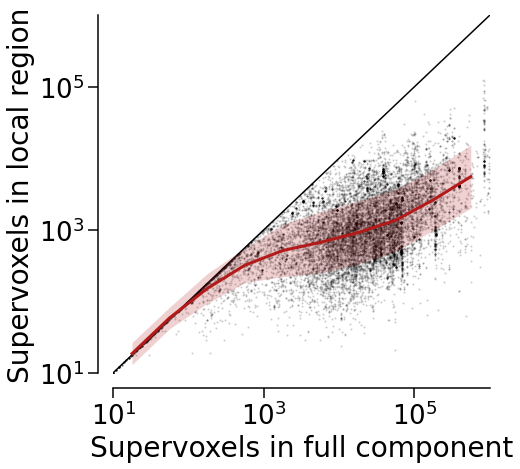

In [13]:
plotting.scatter_w_binstats_plot(meas_df["n_sv_global"], meas_df["n_sv_local"], 
                      xrange=[10**1, 10**6],
                      yrange=[10**1, 10**6],
                      marker_size=2,
                      plot_diagonal=True,
                      xlog=True, ylog=True,
                      figsize=(7, 6.5),
                      color="k",
                      xlabel="Supervoxels in full component",
                      ylabel="Supervoxels in local region", alpha=.2,
                      path=f"{figure_dir}/sv_global_vs_sv_local.png")

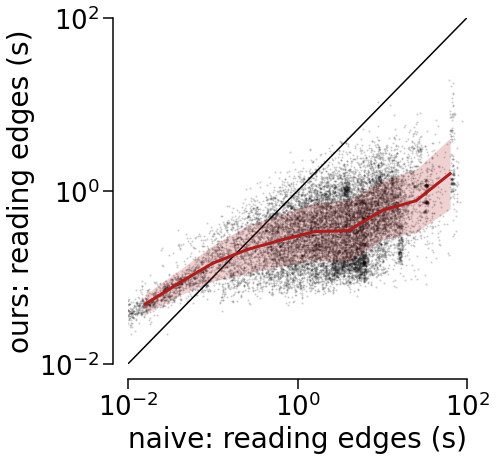

In [14]:
plotting.scatter_w_binstats_plot(meas_df["read_naive"], meas_df["read_pcg"], 
                      xrange=[10**(-2), 10**2],
                      yrange=[10**(-2), 10**2],
                      marker_size=2,
                      plot_diagonal=True,
                      xlog=True, ylog=True,
                      figsize=(7, 6.5),
                      color="k",
                      xlabel="naive: reading edges (s)",
                      ylabel="ours: reading edges (s)", alpha=.2,
                      path=f"{figure_dir}/reading_pcg_vs_naive.png")

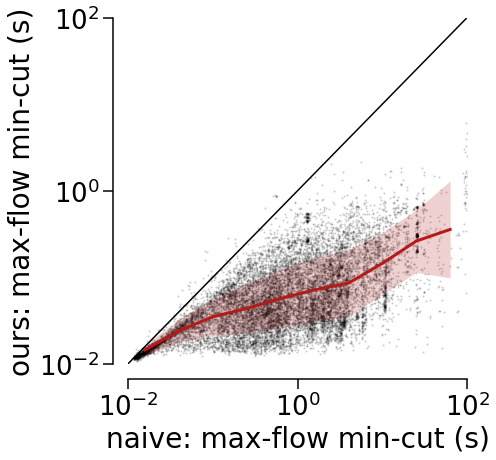

In [15]:
plotting.scatter_w_binstats_plot(meas_df["mincut_naive"], meas_df["mincut_pcg"], 
                      marker_size=2,
                      xrange=[10**(-2), 10**2],
                      yrange=[10**(-2), 10**2],
                      plot_diagonal=True,
                      xlog=True, ylog=True,
                      figsize=(7, 6.5),
                      color="k",
                      xlabel="naive: max-flow min-cut (s)",
                      ylabel="ours: max-flow min-cut (s)", alpha=.2,
                      path=f"{figure_dir}/mincut_pcg_vs_naive.png")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


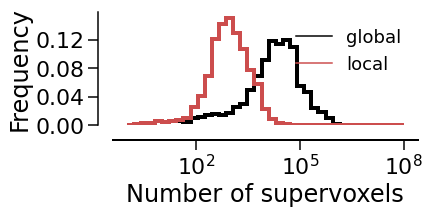

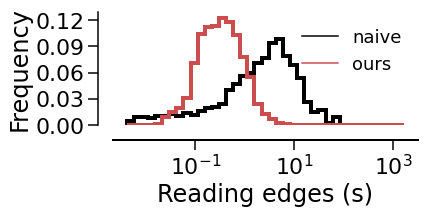

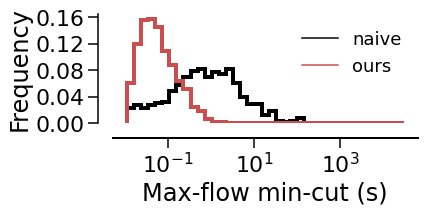

In [16]:
plotting.comp_hist_plot({"global": meas_df["n_sv_global"], "local": meas_df["n_sv_local"]}, 
                        figsize=(6, 3), normalize=True, color_list=["k", [.8, .3, .3]],
                        logbins=True, nbins=40, xlabel="Number of supervoxels",
                        data_range=[1, 10**8], 
                        xlabel_fontsize=30, tick_label_size=24,
                        path=f"{figure_dir}/sv_global_vs_sv_local_comp_hist.png")

plotting.comp_hist_plot({"naive": meas_df["read_naive"], "ours": meas_df["read_pcg"]}, 
                        figsize=(6, 3), normalize=True, color_list=["k", [.8, .3, .3]],
                        xlabel_fontsize=30, tick_label_size=24,
                        logbins=True, nbins=40, xlabel="Reading edges (s)",
                        path=f"{figure_dir}/reading_pcg_vs_naive_comp_hist.png")

plotting.comp_hist_plot({"naive": meas_df["mincut_naive"], "ours": meas_df["mincut_pcg"]}, 
                        figsize=(6, 3), normalize=True, color_list=["k", [.8, .3, .3]],
                        logbins=True, nbins=40, 
                        xlabel_fontsize=30, tick_label_size=24,
                        xlabel="Max-flow min-cut (s)",
                        path=f"{figure_dir}/mincut_pcg_vs_naive_comp_hist.png")

In [17]:
meas_df.to_csv(f"{figure_source_dir}/g_h_i_source.csv")